In [12]:
import matplotlib.pyplot as plt
import numpy as np
from qctrlvisualizer import plot_controls, get_qctrl_style

plt.style.use(get_qctrl_style())

from qctrl import Qctrl

# Starting a session with the API
qctrl = Qctrl()

## Estimating SPAM

In [154]:
shot_count = 1_000

In [160]:
idle_times = np.linspace(1e-10, 0.5, 100)

controls = [
        {"duration": time, "values": np.array([0. + 0.j])}
        for time in idle_times 
    ]

experiment_results = qctrl.functions.calculate_qchack_measurements(
    controls=controls,
    shot_count=shot_count
)

  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 6s.


In [161]:
# SPAM estimation
mistakes = np.array([sum(1 if x == 1 else 0 for x in measure)
                    for measure in experiment_results.measurements])
confusion_rate = mistakes / shot_count
print(confusion_rate * 100)

[0.6 1.  0.7 1.2 1.1 1.5 1.1 1.3 1.3 1.  1.  0.5 1.7 1.  1.9 1.  0.9 0.9
 1.3 1.3 0.7 1.  0.6 0.8 0.6 0.7 1.3 0.7 1.  1.3 1.2 1.  1.1 0.8 0.8 1.4
 1.4 0.4 1.4 0.6 1.7 1.7 1.1 0.9 0.5 1.1 1.1 0.8 0.8 1.1 0.5 0.7 1.2 0.5
 1.5 1.  1.  1.6 0.9 1.1 1.1 0.9 0.9 0.7 1.3 0.9 0.8 1.  1.2 1.  0.7 0.9
 0.7 1.4 1.4 0.5 1.2 1.1 0.9 1.  0.9 0.7 1.4 0.7 1.9 0.8 1.2 1.4 0.6 0.8
 0.9 1.3 0.7 0.8 0.6 1.1 0.4 1.3 0.5 1.3]


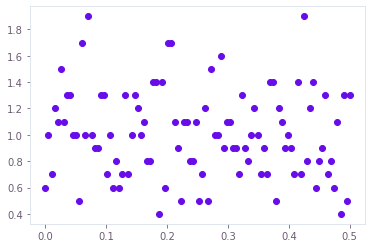

In [162]:
plt.scatter(idle_times, confusion_rate*100)

In [164]:
with open('spam.txt', 'w') as outfile:
    for t, e in zip(idle_times, confusion_rate):
        outfile.write(f'{t} {e}\n')

In [163]:
np.median(confusion_rate)

0.01

First let's confirm that the population is successfully driven to $|1\rangle$. This has also been done in the Sagar notebook.

  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 15s.


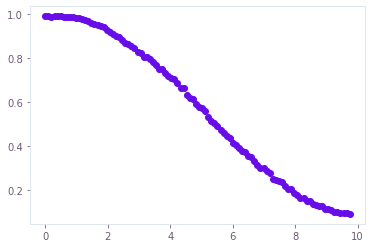

In [148]:
## Experimentally obtained NOT gate
period = 19.4887485853892 # For Ω = -1.0

gate_time = period / 2
values = np.array([-1])  # One part Y for two parts X

durations = np.linspace(1e-10, gate_time, 100)
shot_count = 10_000
experiment_results = qctrl.functions.calculate_qchack_measurements(
        controls=[{"duration": duration, "values": values}
                 for duration in durations],
        shot_count=shot_count
)

plt.scatter(durations, [m.count(0) / shot_count for m in experiment_results.measurements])

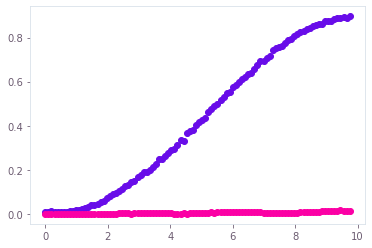

In [149]:
plt.scatter(durations, [m.count(1) / shot_count for m in experiment_results.measurements])
plt.scatter(durations, [m.count(2) / shot_count for m in experiment_results.measurements])

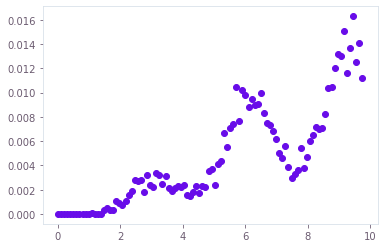

In [150]:
plt.scatter(durations, [m.count(2) / shot_count for m in experiment_results.measurements])

Good enough :^)

Let's drive the population, then turn it off. We expect some effect from the linear filter when turning the pulse off, etc.

In [127]:
period = 19.4887485853892 # For Ω = -1.0

excite_time = period / 2
off_time = excite_time / 2
full_duration = excite_time + off_time
resolution = 1

excite_duration = np.repeat(resolution, int(excite_time/resolution))
excite_values = np.repeat(-1, int(excite_time/resolution))

off_duration = np.repeat(resolution, int(off_time/resolution))
off_values = np.repeat(0., int(off_time/resolution))

durations = np.array([*excite_duration, *off_duration])
values = np.array([*excite_values, *off_values])

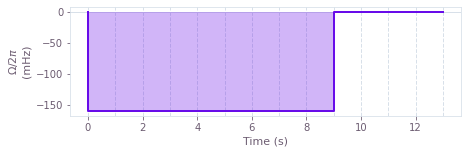

In [128]:
# Plot the pulse
plot_controls(
    figure=plt.figure(),
    controls={
        "$\Omega$": [{"duration": duration, "value": value}
                 for duration, value in zip(durations, values)]
    },
)

In [143]:
shot_count = 10_000
measurement_count = 100
start_off = .1

t_values = np.linspace(start_off, 1., measurement_count)

experiment_results = qctrl.functions.calculate_qchack_measurements(
        controls=[
            {
                "duration": excite_time + t_off*off_time,
                "values": np.concatenate([excite_values, np.repeat(0., int(t_off*off_time/resolution))])
            }
            for t_off in t_values],
        shot_count=shot_count
)

  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 15s.


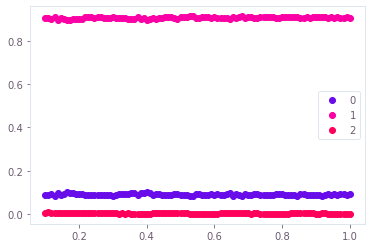

In [144]:
plt.scatter(
    t_values,
    [m.count(0) / shot_count for m in experiment_results.measurements],
    label='0')
plt.scatter(
    t_values,
    [m.count(1) / shot_count for m in experiment_results.measurements],
    label='1')
plt.scatter(
    t_values,
    [m.count(2) / shot_count for m in experiment_results.measurements],
    label='2')
plt.legend()

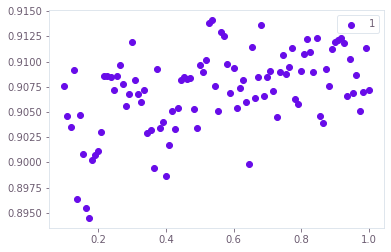

In [145]:
plt.scatter(
    t_values,
    [m.count(1) / shot_count for m in experiment_results.measurements],
    label='1')
plt.legend()

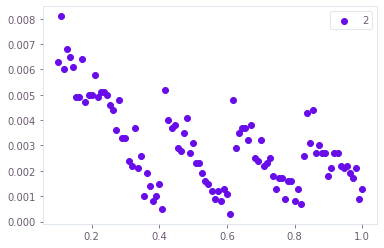

In [146]:
plt.scatter(
    t_values,
    [m.count(2) / shot_count for m in experiment_results.measurements],
    label='2')
plt.legend()